# Chapter 17
# Graphics including GenomeDiagram

## 17.1 GenomeDiagram

### 17.1.1 Introduction

This module is easiest to use if you have your genome loaded as a SeqRecord object containing lots of
SeqFeature objects - for example as loaded from a GenBank file

### 17.1.2 Diagrams, tracks, feature-sets and features

### 17.1.3 A top down example
* Download test file: [`NC_005816.gb`](https://github.com/biopython/biopython/blob/master/Tests/GenBank/NC_005816.gb)

In [1]:
!pip install IPython      

In [2]:
#Lets load notebook's Image
from IPython.core.display import Image 

In [3]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
record = SeqIO.read("NC_005816.gb", "genbank")

In [4]:
gd_diagram = GenomeDiagram.Diagram("Yersinia pestis biovar Microtus plasmid pPCP1")
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

In [5]:
for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True)

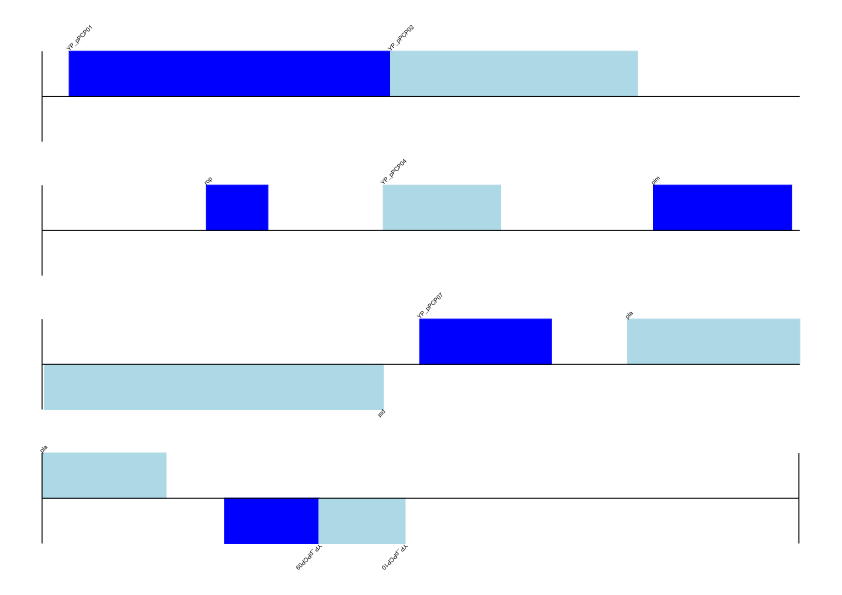

In [6]:
gd_diagram.draw(
    format="linear",
    orientation="landscape",
    pagesize="A4",
    fragments=4,
    start=0,
    end=len(record),
)
gd_diagram.write("plasmid_linear.pdf", "PDF")
gd_diagram.write("plasmid_linear.eps", "EPS")
gd_diagram.write("plasmid_linear.svg", "SVG")
gd_diagram.write("plasmid_linear.png", "png")
Image("plasmid_linear.png")

In [7]:
gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(20 * cm, 20 * cm),
    start=0,
    end=len(record),
    circle_core=0.7,
)
gd_diagram.write("plasmid_circular.pdf", "PDF")

### 17.1.4 A bottom up example

In [8]:
from reportlab.lib import colors
from reportlab.lib.units import cm

from Bio.Graphics import GenomeDiagram
from Bio import SeqIO

record = SeqIO.read("NC_005816.gb", "genbank")

# Create the feature set and its feature objects,
gd_feature_set = GenomeDiagram.FeatureSet()
for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True)

# (this for loop is the same as in the previous example)
# Create a track, and a diagram
gd_track_for_features = GenomeDiagram.Track(name="Annotated Features")
gd_diagram = GenomeDiagram.Diagram("Yersinia pestis biovar Microtus plasmid pPCP1")
# Now have to glue the bits together...
gd_track_for_features.add_set(gd_feature_set)
gd_diagram.add_track(gd_track_for_features, 1)

### 17.1.5 Features without a SeqFeature

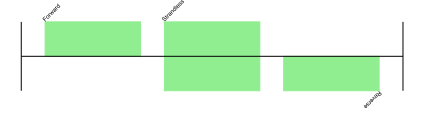

In [9]:
from Bio.SeqFeature import SeqFeature, SimpleLocation
my_seq_feature = SeqFeature(SimpleLocation(50, 100, strand=+1))

from Bio.SeqFeature import SeqFeature, SimpleLocation
from Bio.Graphics import GenomeDiagram
from reportlab.lib.units import cm

gdd = GenomeDiagram.Diagram("Test Diagram")
gdt_features = gdd.new_track(1, greytrack=False)
gds_features = gdt_features.new_set()

# Add three features to show the strand options,
feature = SeqFeature(SimpleLocation(25, 125, strand=+1))
gds_features.add_feature(feature, name="Forward", label=True)
feature = SeqFeature(SimpleLocation(150, 250, strand=None))
gds_features.add_feature(feature, name="Strandless", label=True)
feature = SeqFeature(SimpleLocation(275, 375, strand=-1))
gds_features.add_feature(feature, name="Reverse", label=True)

gdd.draw(format="linear", pagesize=(15 * cm, 4 * cm), fragments=1, start=0, end=400)
gdd.write("GD_labels_default.pdf", "pdf")
gdd.write("GD_labels_default.png", "png")
Image("GD_labels_default.png")

### 17.1.6 Feature captions
```
>>> gd_feature_set.add_feature(feature, color=color, label=True)
>>> gd_feature_set.add_feature(feature, color=color, label=True, name="My Gene")
```

**Large font, parallel with the track**
```
gd_feature_set.add_feature(
    feature, label=True, color="green", label_size=25, label_angle=0
)
```

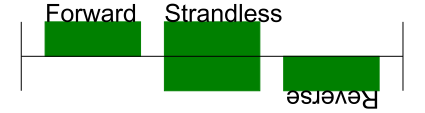

In [10]:
gdd_1 = GenomeDiagram.Diagram("Test Diagram")
gdt_features = gdd_1.new_track(1, greytrack=False)
gd_feature_set = gdt_features.new_set()

# Large font, parallel with the track
# Add three features
feature = SeqFeature(SimpleLocation(25, 125, strand=+1))
gd_feature_set.add_feature(feature, name="Forward", label=True, color="green", label_size=25, label_angle=0)
feature = SeqFeature(SimpleLocation(150, 250, strand=None))
gd_feature_set.add_feature(feature, name="Strandless", label=True, color="green", label_size=25, label_angle=0)
feature = SeqFeature(SimpleLocation(275, 375, strand=-1))
gd_feature_set.add_feature(feature, name="Reverse", label=True, color="green", label_size=25, label_angle=0)

gdd_1.draw(format="linear", pagesize=(15 * cm, 4 * cm), fragments=1, start=0, end=400)
gdd_1.write("GD_labels_default-1.png", "png")
Image("GD_labels_default-1.png")

**Very small font, perpendicular to the track (towards it)**
```
gd_feature_set.add_feature(
    feature,
    label=True,
    color="purple",
    label_position="end",
    label_size=4,
    label_angle=90,
)
```

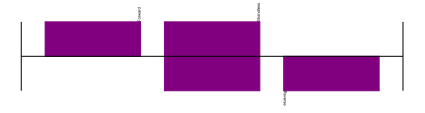

In [11]:
gdd_2 = GenomeDiagram.Diagram("Test Diagram")
gdt_features = gdd_2.new_track(1, greytrack=False)
gd_feature_set = gdt_features.new_set()

# Very small font, perpendicular to the track (towards it)
# Add three features
feature = SeqFeature(SimpleLocation(25, 125, strand=+1))
gd_feature_set.add_feature(feature, name="Forward", label=True, color="purple", label_position="end", label_size=4, label_angle=90)
feature = SeqFeature(SimpleLocation(150, 250, strand=None))
gd_feature_set.add_feature(feature, name="Strandless", label=True, color="purple", label_position="end", label_size=4, label_angle=90)
feature = SeqFeature(SimpleLocation(275, 375, strand=-1))
gd_feature_set.add_feature(feature, name="Reverse", label=True, color="purple", label_position="end", label_size=4, label_angle=90)

gdd_2.draw(format="linear", pagesize=(15 * cm, 4 * cm), fragments=1, start=0, end=400)
gdd_2.write("GD_labels_default-2.png", "png")
Image("GD_labels_default-2.png")

**Small font, perpendicular to the track (away from it)**
```
gd_feature_set.add_feature(
    feature,
    label=True,
    color="blue",
    label_position="middle",
    label_size=6,
    label_angle=-90,
)
```

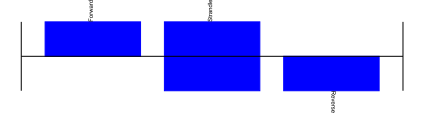

In [12]:
gdd_3 = GenomeDiagram.Diagram("Test Diagram")
gdt_features = gdd_3.new_track(1, greytrack=False)
gd_feature_set = gdt_features.new_set()

# Small font, perpendicular to the track (away from it)
# Add three features
feature = SeqFeature(SimpleLocation(25, 125, strand=+1))
gd_feature_set.add_feature(feature, name="Forward", label=True, color="blue", label_position="middle", label_size=6, label_angle=90)
feature = SeqFeature(SimpleLocation(150, 250, strand=None))
gd_feature_set.add_feature(feature, name="Strandless", label=True, color="blue", label_position="middle", label_size=6, label_angle=90)
feature = SeqFeature(SimpleLocation(275, 375, strand=-1))
gd_feature_set.add_feature(feature, name="Reverse", label=True, color="blue", label_position="middle", label_size=6, label_angle=90)

gdd_3.draw(format="linear", pagesize=(15 * cm, 4 * cm), fragments=1, start=0, end=400)
gdd_3.write("GD_labels_default-3.png", "png")
Image("GD_labels_default-3.png")

### 17.1.7 Feature sigils

In [13]:
# Default uses a BOX sigil
gd_feature_set.add_feature(feature)

In [14]:
# You can make this explicit:
gd_feature_set.add_feature(feature, sigil="BOX")

In [15]:
# Or opt for an arrow:
gd_feature_set.add_feature(feature, sigil="ARROW")

In [16]:
# Box with corners cut off (making it an octagon)
gd_feature_set.add_feature(feature, sigil="OCTO")

In [17]:
# Box with jagged edges (useful for showing breaks in contains)
gd_feature_set.add_feature(feature, sigil="JAGGY")

In [18]:
# Arrow which spans the axis with strand used only for direction
gd_feature_set.add_feature(feature, sigil="BIGARROW")

### 17.1.8 Arrow sigils

In [19]:
# Full height shafts, giving pointed boxes:
gd_feature_set.add_feature(feature, sigil="ARROW", color="brown", arrowshaft_height=1.0)
# Or, thin shafts:
gd_feature_set.add_feature(feature, sigil="ARROW", color="teal", arrowshaft_height=0.2)
# Or, very thin shafts:
gd_feature_set.add_feature(feature, sigil="ARROW", color="darkgreen", arrowshaft_height=0.1)

In [20]:
# Short arrow heads:
gd_feature_set.add_feature(feature, sigil="ARROW", color="blue", arrowhead_length=0.25)
# Or, longer arrow heads:
gd_feature_set.add_feature(feature, sigil="ARROW", color="orange", arrowhead_length=1)
# Or, very very long arrow heads (i.e. all head, no shaft, so triangles):
gd_feature_set.add_feature(feature, sigil="ARROW", color="red", arrowhead_length=10000)

In [21]:
# A large arrow straddling the axis:
gd_feature_set.add_feature(feature, sigil="BIGARROW")

### 17.1.9 A nice example

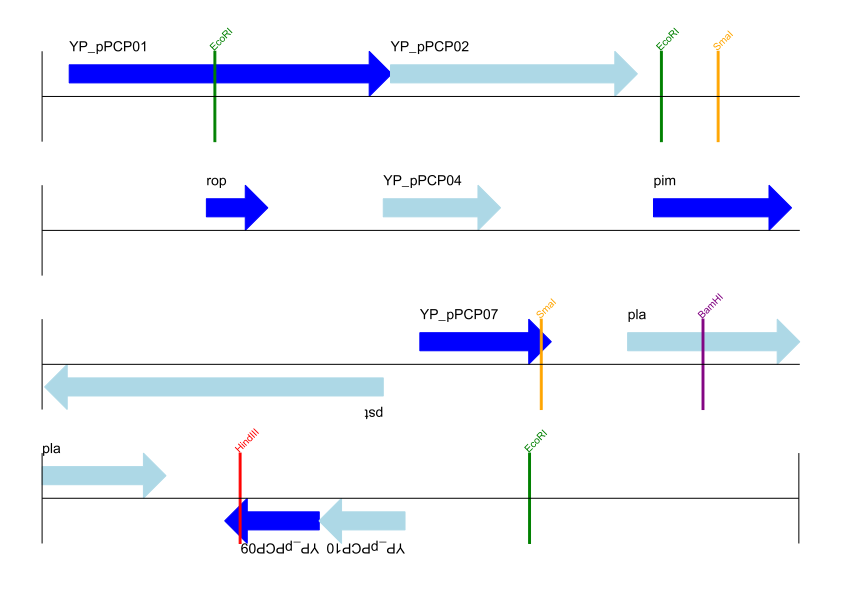

In [22]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, SimpleLocation

record = SeqIO.read("NC_005816.gb", "genbank")
gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()
for feature in record.features:
    if feature.type != "gene":
    # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
    feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
)

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
    ("CCCGGG", "SmaI", colors.orange),
    ("AAGCTT", "HindIII", colors.red),
    ("GGATCC", "BamHI", colors.purple),
]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(SimpleLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=10,
            label_color=color,
    )
        index += len(site)
gd_diagram.draw(format="linear", pagesize="A4", fragments=4, start=0, end=len(record))
gd_diagram.write("plasmid_linear_nice.pdf", "PDF")
gd_diagram.write("plasmid_linear_nice.eps", "EPS")
gd_diagram.write("plasmid_linear_nice.svg", "SVG")
gd_diagram.write("plasmid_linear_nice.png", "png")

gd_diagram.draw(
format="circular",
circular=True,
pagesize=(20 * cm, 20 * cm),
start=0,
end=len(record),
circle_core=0.5,
)
gd_diagram.write("plasmid_circular_nice.pdf", "PDF")
gd_diagram.write("plasmid_circular_nice.eps", "EPS")
gd_diagram.write("plasmid_circular_nice.svg", "SVG")
Image("plasmid_linear_nice.png")

### 17.1.10 Multiple tracks
* Download test file: `NC_002703.gbk`, `AF323668.gbk`, `NC_003212.gbk`

```
import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "A.N.Other@example.com" # Always tell NCBI who you are
filelist = ["NC_002703", "AF323668", "NC_003212"]
for filename in filelist:
    if not os.path.isfile(filename+".gbk"):
        # Downloading...
        net_handle = Entrez.efetch(
            db="nucleotide", id=filename, rettype="gb", retmode="text"
        )
        out_handle = open(filename+".gbk", "w")
        out_handle.write(net_handle.read())
        out_handle.close()
        net_handle.close()
        print("Saved")
```

In [23]:
from Bio import SeqIO
A_rec = SeqIO.read("NC_002703.gbk", "gb")
B_rec = SeqIO.read("AF323668.gbk", "gb")
C_rec = SeqIO.read("NC_003212.gbk", "gb")[2587879:2625807].reverse_complement(name=True)

In [24]:
from reportlab.lib.colors import (
    red,
    grey,
    orange,
    green,
    brown,
    blue,
    lightblue,
    purple,
)

A_colors = (
    [red] * 5
    + [grey] * 7
    + [orange] * 2
    + [grey] * 2
    + [orange]
    + [grey] * 11
    + [green] * 4
    + [grey]
    + [green] * 2
    + [grey, green]
    + [brown] * 5
    + [blue] * 4
    + [lightblue] * 5
    + [grey, lightblue]
    + [purple] * 2
    + [grey]
)

B_colors = (
    [red] * 6
    + [grey] * 8
    + [orange] * 2
    + [grey]
    + [orange]
    + [grey] * 21
    + [green] * 5
    + [grey]
    + [brown] * 4
    + [blue] * 3
    + [lightblue] * 3
    + [grey] * 5
    + [purple] * 2
)

C_colors = (
    [grey] * 30
    + [green] * 5
    + [brown] * 4
    + [blue] * 2
    + [grey, blue]
    + [lightblue] * 2
    + [grey] * 5
)

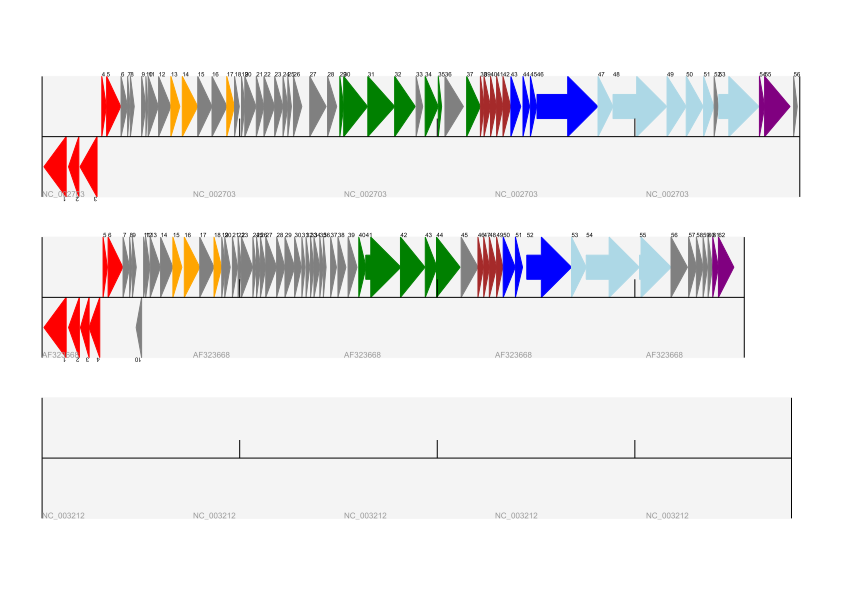

In [25]:
from Bio.Graphics import GenomeDiagram
name = "Proux Fig 6"
gd_diagram = GenomeDiagram.Diagram(name)
max_len = 0
for record, gene_colors in zip([A_rec, B_rec, C_rec], [A_colors,B_colors, C_colors]):
    max_len = max(max_len, len(record))
    gd_track_for_features = gd_diagram.new_track(
        1, name=record.name, greytrack=True, start=0, end=len(record)
    )
    gd_feature_set = gd_track_for_features.new_set()
    i = 0
    for feature in record.features:
        if feature.type != "gene":
        # Exclude this feature
            continue
        gd_feature_set.add_feature(
            feature,
            sigil="ARROW",
            color=gene_colors[i],
            label=True,
            name=str(i + 1),
            label_position="start",
            label_size=6,
            label_angle=0,
        )
        i += 1
gd_diagram.draw(format="linear", pagesize="A4", fragments=1, start=0, end=max_len)
gd_diagram.write(name + ".png", "png")
Image(name + ".png")

### 17.1.11 Cross-Links between tracks

In [26]:
A_vs_B = [
(99, "Tuc2009_01", "int"),
(33, "Tuc2009_03", "orf4"),
(94, "Tuc2009_05", "orf6"),
(100, "Tuc2009_06", "orf7"),
(97, "Tuc2009_07", "orf8"),
(98, "Tuc2009_08", "orf9"),
(98, "Tuc2009_09", "orf10"),
(100, "Tuc2009_10", "orf12"),
(100, "Tuc2009_11", "orf13"),
(94, "Tuc2009_12", "orf14"),
(87, "Tuc2009_13", "orf15"),
(94, "Tuc2009_14", "orf16"),
(94, "Tuc2009_15", "orf17"),
(88, "Tuc2009_17", "rusA"),
(91, "Tuc2009_18", "orf20"),
(93, "Tuc2009_19", "orf22"),
(71, "Tuc2009_20", "orf23"),
(51, "Tuc2009_22", "orf27"),
(97, "Tuc2009_23", "orf28"),
(88, "Tuc2009_24", "orf29"),
(26, "Tuc2009_26", "orf38"),
(19, "Tuc2009_46", "orf52"),
(77, "Tuc2009_48", "orf54"),
(91, "Tuc2009_49", "orf55"),
(95, "Tuc2009_52", "orf60"),
]

In [27]:
B_vs_C = [
(42, "orf39", "lin2581"),
(31, "orf40", "lin2580"),
(49, "orf41", "lin2579"), # terL
(54, "orf42", "lin2578"), # portal
(55, "orf43", "lin2577"), # protease
(33, "orf44", "lin2576"), # mhp
(51, "orf46", "lin2575"),
(33, "orf47", "lin2574"),
(40, "orf48", "lin2573"),
(25, "orf49", "lin2572"),
(50, "orf50", "lin2571"),
(48, "orf51", "lin2570"),
(24, "orf52", "lin2568"),
(30, "orf53", "lin2567"),
(28, "orf54", "lin2566"),
] 

In [28]:
def get_feature(features, id, tags=["locus_tag", "gene"]):
    """Search list of SeqFeature objects for an identifier under the given tags."""
    for f in features:
        for key in tags:
            #tag may not be present in this feature 
            for x in f.qualifiers.get(key, []):
                if x == id:
                     return f
    raise KeyError(id)


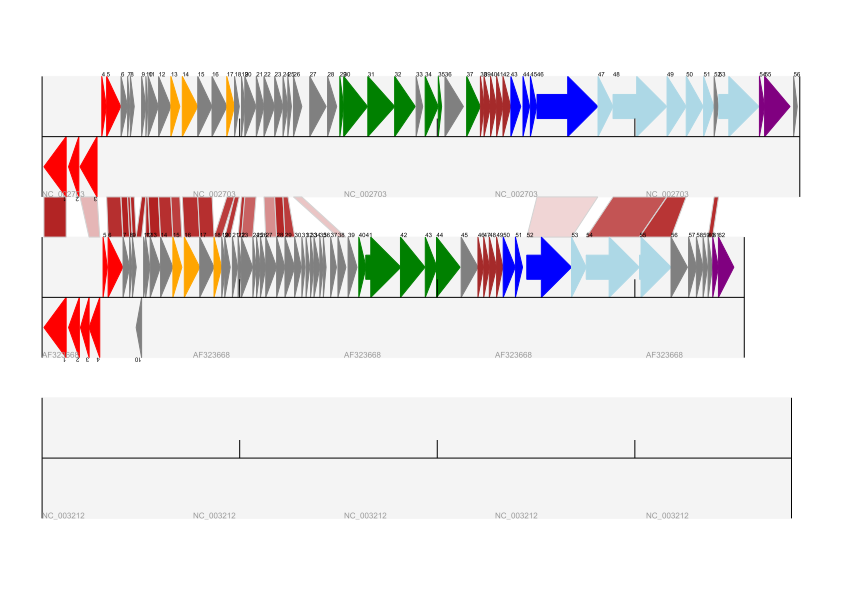

In [29]:
from Bio.Graphics.GenomeDiagram import CrossLink
from reportlab.lib import colors

#Note it might have been clearer to assign the track numbers explicitly...                                                          
for rec_X, tn_X, rec_Y, tn_Y, X_vs_Y in [
    (A_rec, 3, B_rec, 2, A_vs_B),
    #(B_rec, 2, C_rec, 1, B_vs_C),
]:
    track_X = gd_diagram.tracks[tn_X]
    track_Y = gd_diagram.tracks[tn_Y]
    for score, id_X, id_Y in X_vs_Y:
        feature_X = get_feature(rec_X.features, id_X)
        feature_Y = get_feature(rec_Y.features, id_Y)
        color = colors.linearlyInterpolatedColor(colors.white, colors.firebrick, 0, 100, score)
        link_xy = CrossLink((track_X, feature_X.location.start, feature_X.location.end),
                            (track_Y, feature_Y.location.start, feature_Y.location.end),
                            color, colors.lightgrey)
        gd_diagram.cross_track_links.append(link_xy)
        
gd_diagram.draw(format="linear", pagesize='A4', fragments=1,
                start=0, end=max_len)
gd_diagram.write("cross.png", "png")
Image("cross.png")

## 7.2 Chromosomes

The Bio.Graphics.BasicChromosome module allows drawing of chromosomes. There is an example in Jupe et al. (2012) (open access) using colors to highlight different gene families.

### 17.2.1 Simple Chromosomes

In [30]:
from Bio import SeqIO
entries = [("Chr I", "NC_003070.fna"),
           ("Chr II", "NC_003071.fna"),
           #("Chr III","NC_003072.fna"),    #No items found.
           #("Chr IV", "NC_003073.fna"),    #No items found.
           ("Chr V", "NC_003074.fna")]
for (name, filename) in entries:
   record = SeqIO.read(filename, "fasta")
   print(name, len(record))

Chr I 30427671
Chr II 19698289
Chr V 23459830


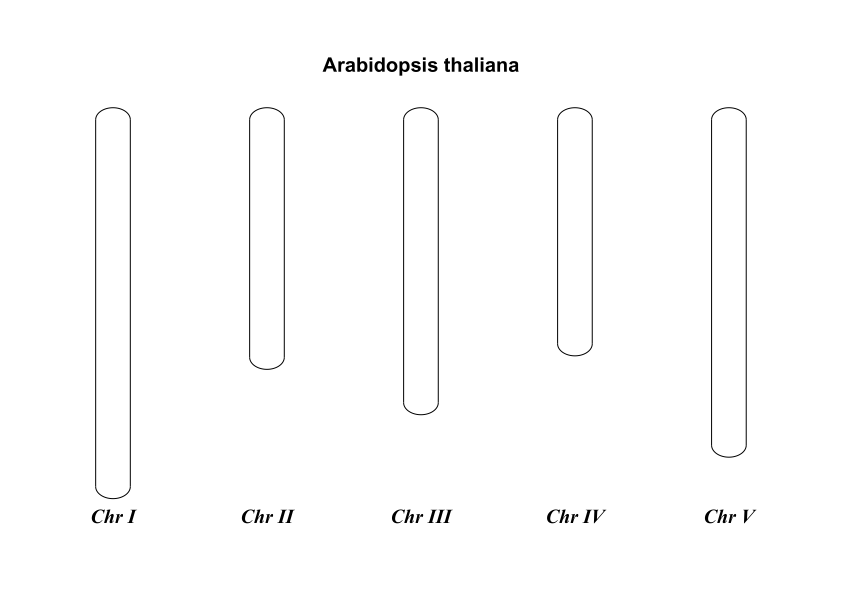

In [31]:
from reportlab.lib.units import cm
from Bio.Graphics import BasicChromosome

entries = [("Chr I", 30432563),
           ("Chr II", 19705359),
           ("Chr III", 23470805),
           ("Chr IV", 18585042),
           ("Chr V", 26992728)]

max_len = 30432563 #Could compute this
telomere_length = 1000000 #For illustration
         
chr_diagram = BasicChromosome.Organism(output_format="png")
chr_diagram.page_size = (29.7*cm, 21*cm) #A4 landscape

for name, length in entries:
    cur_chromosome = BasicChromosome.Chromosome(name)
    #Set the scale to the MAXIMUM length plus the two telomeres in bp,
    #want the same scale used on all five chromosomes so they can be
    #compared to each other
    cur_chromosome.scale_num = max_len + 2 * telomere_length

    #Add an opening telomere
    start = BasicChromosome.TelomereSegment()
    start.scale = telomere_length
    cur_chromosome.add(start)

    #Add a body - using bp as the scale length here.
    body = BasicChromosome.ChromosomeSegment()
    body.scale = length
    cur_chromosome.add(body)

    #Add a closing telomere
    end = BasicChromosome.TelomereSegment(inverted=True)
    end.scale = telomere_length
    cur_chromosome.add(end)

    #This chromosome is done
    chr_diagram.add(cur_chromosome)

chr_diagram.draw("simple_chrom.png", "Arabidopsis thaliana")
Image("simple_chrom.png")

## 17.2.2 Annotated Chromosomes
Continuing from the previous example, let’s also show the tRNA genes. We’ll get their locations by parsing
the GenBank files for the five Arabidopsis thaliana chromosomes. You’ll need to download these files from the
NCBI FTP site ftp://ftp.ncbi.nlm.nih.gov/genomes/archive/old_refseq/Arabidopsis_thaliana/,
and preserve the subdirectory names or edit the paths below:

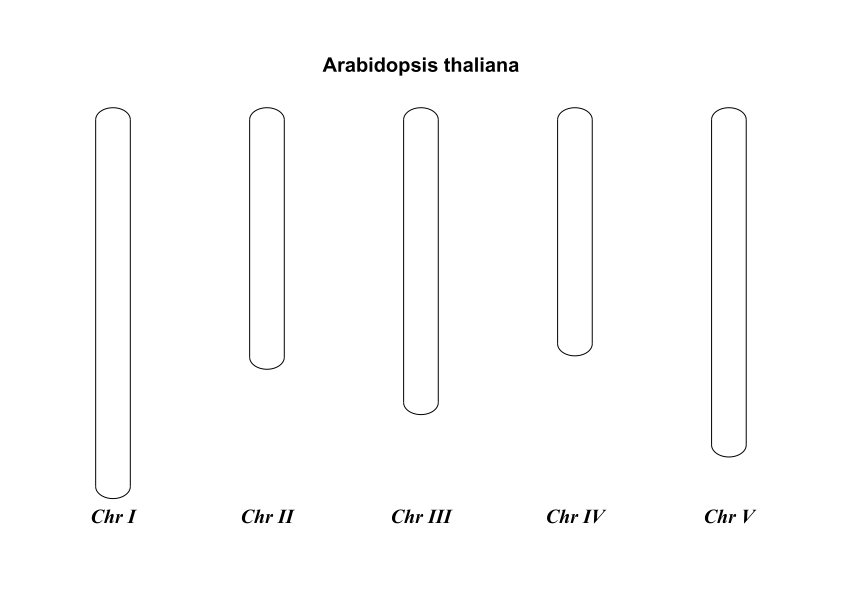

In [32]:
from reportlab.lib.units import cm
from Bio import SeqIO
from Bio.Graphics import BasicChromosome

entries = [
    ("Chr I", "NC_003070.gbk"),
    ("Chr II", "NC_003071.gbk"),
    ("Chr III", "NC_003074.gbk"),
    ("Chr IV", "NC_003075.gbk"),
    ("Chr V", "NC_003076.gbk"),
    ]

max_len = 30432563 # Could compute this from the entries dict
telomere_length = 1000000 # For illustration

chr_diagram = BasicChromosome.Organism(output_format="png")
chr_diagram.page_size = (29.7 * cm, 21 * cm) # A4 landscape

for index, (name, filename) in enumerate(entries):
    record = SeqIO.read(filename, "genbank")
    length = len(record)
    features = [f for f in record.features if f.type == "tRNA"]
    # Record an Artemis style integer color in the feature's qualifiers,
    # 1 = Black, 2 = Red, 3 = Green, 4 = blue, 5 =cyan, 6 = purple
    for f in features:
        f.qualifiers["color"] = [index + 2]

    cur_chromosome = BasicChromosome.Chromosome(name)
    # Set the scale to the MAXIMUM length plus the two telomeres in bp,
    # want the same scale used on all five chromosomes so they can be
    # compared to each other
    cur_chromosome.scale_num = max_len + 2 * telomere_length

    # Add an opening telomere
    start = BasicChromosome.TelomereSegment()
    start.scale = telomere_length
    cur_chromosome.add(start)

    # Add a body - again using bp as the scale length here.
    body = BasicChromosome.AnnotatedChromosomeSegment(length, features)
    body.scale = length
    cur_chromosome.add(body)

    # Add a closing telomere
    end = BasicChromosome.TelomereSegment(inverted=True)
    end.scale = telomere_length
    cur_chromosome.add(end)

    # This chromosome is done
    chr_diagram.add(cur_chromosome)
    
chr_diagram.draw("tRNA_chrom.png", "Arabidopsis thaliana")
Image("tRNA_chrom.png")